In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
# Set random seed
np.random.seed(0)

In [2]:
df = pd.read_csv("datasets_dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


In [3]:
#Check missing values
df.isnull().values.any()
df[df.isna().any(axis=1)]

#no missing values found

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade


In [4]:
#Find the columns containing only 0 for all rows
df.loc[:, (df == 0).all()]

,Week1_Stat1
0,0
1,0
2,0
3,0
4,0
...,...
102,0
103,0
104,0
105,0


In [5]:
#Delete this column since it is not useful for our analysis and remove the ID column
df = df.drop(columns=['Week1_Stat1', 'ID'])

In [6]:
#Check the number of columns (now we have 46 instead of 48)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Week2_Quiz1  107 non-null    float64
 1   Week3_MP1    107 non-null    float64
 2   Week3_PR1    107 non-null    float64
 3   Week5_MP2    107 non-null    float64
 4   Week5_PR2    107 non-null    float64
 5   Week7_MP3    107 non-null    float64
 6   Week7_PR3    107 non-null    float64
 7   Week4_Quiz2  107 non-null    float64
 8   Week6_Quiz3  107 non-null    float64
 9   Week8_Total  107 non-null    float64
 10  Week1_Stat0  107 non-null    int64  
 11  Week1_Stat2  107 non-null    int64  
 12  Week1_Stat3  107 non-null    int64  
 13  Week2_Stat0  107 non-null    int64  
 14  Week2_Stat1  107 non-null    int64  
 15  Week2_Stat2  107 non-null    int64  
 16  Week2_Stat3  107 non-null    int64  
 17  Week3_Stat0  107 non-null    int64  
 18  Week3_Stat1  107 non-null    int64  
 19  Week3_St

In [7]:
#View the summary of the df
df.describe()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.406636,7.949626,2.803738,9.237757,2.844673,14.481869,2.383178,2.609439,2.663551,47.380467,...,1.252336,10.514019,3.130841,1.112150,0.355140,7.663551,1.607477,1.093458,0.046729,2.074766
std,2.000317,6.892312,2.493158,8.640610,2.482099,14.080211,2.437501,2.229419,2.414359,41.035589,...,2.399267,15.563846,4.841028,3.658351,1.191577,9.277630,2.687346,3.368928,0.483368,1.993863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.330000,12.000000,5.000000,10.870000,5.000000,15.910000,2.500000,3.170000,4.000000,71.530000,...,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
75%,4.170000,14.305000,5.000000,18.045000,5.000000,27.440000,5.000000,4.710000,5.000000,83.550000,...,2.000000,14.000000,5.000000,0.000000,0.000000,11.000000,2.000000,0.500000,0.000000,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,...,12.000000,90.000000,27.000000,22.000000,9.000000,62.000000,12.000000,25.000000,5.000000,5.000000


In [8]:
indx_length = len(df.columns)
indx_length = indx_length - 1

indx_length

45

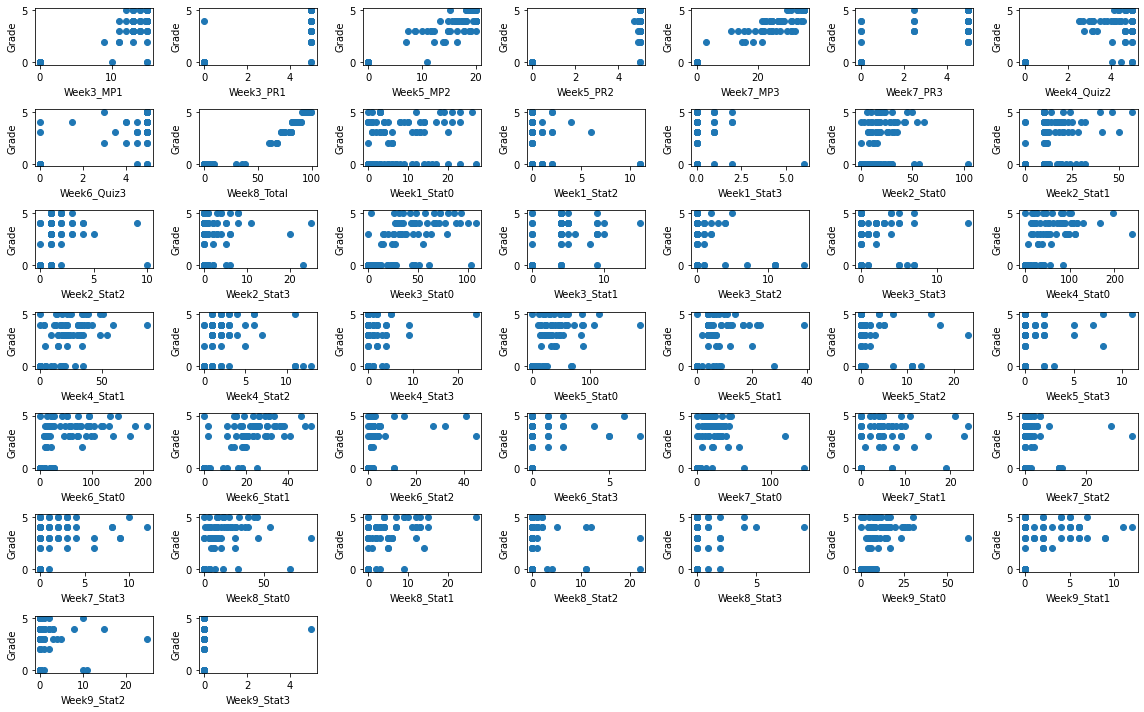

In [9]:
#Data Visualization Part 
#Scatter plot

fig = plt.figure(figsize=(16, 10)) 
vector_names = df.columns[0:45]

for i in range(1,indx_length):
    ax = fig.add_subplot(7, 7, i)
    plt.scatter(df.iloc[:, [i]], df.iloc[:,45])
    ax.set_xlabel(vector_names[i])
    ax.set_ylabel('Grade')
    fig.tight_layout()
plt.show()



In [10]:
df.corr()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
Week2_Quiz1,1.000000,0.739992,0.723109,0.677371,0.710990,0.635804,0.622655,0.746331,0.695119,0.739192,...,0.391529,0.390792,0.429210,0.018500,0.235174,0.472536,0.436145,0.213437,0.045046,0.689783
Week3_MP1,0.739992,1.000000,0.962502,0.905769,0.964849,0.881352,0.834397,0.879998,0.912700,0.965074,...,0.455459,0.477576,0.541086,0.037039,0.268698,0.549969,0.518334,0.154754,0.099824,0.901788
Week3_PR1,0.723109,0.962502,1.000000,0.890706,0.942896,0.868638,0.830599,0.904170,0.906560,0.952095,...,0.456261,0.403779,0.500834,0.022088,0.185638,0.561184,0.489662,0.170683,0.085965,0.887352
Week5_MP2,0.677371,0.905769,0.890706,1.000000,0.932880,0.904458,0.874247,0.808479,0.847296,0.962302,...,0.474257,0.509593,0.559422,0.032855,0.204243,0.581338,0.455110,0.149925,0.097039,0.953488
Week5_PR2,0.710990,0.964849,0.942896,0.932880,1.000000,0.897020,0.854744,0.863713,0.887432,0.968613,...,0.447560,0.520521,0.554598,0.037541,0.245074,0.549798,0.522180,0.165532,0.084738,0.907837
Week7_MP3,0.635804,0.881352,0.868638,0.904458,0.897020,1.000000,0.807097,0.781677,0.814492,0.957955,...,0.355063,0.429833,0.578306,-0.027907,0.225299,0.480964,0.503761,0.099568,0.053977,0.968130
Week7_PR3,0.622655,0.834397,0.830599,0.874247,0.854744,0.807097,1.000000,0.785238,0.814822,0.883680,...,0.480963,0.455430,0.498989,0.017352,0.274266,0.570810,0.569017,0.190900,0.104765,0.865616
Week4_Quiz2,0.746331,0.879998,0.904170,0.808479,0.863713,0.781677,0.785238,1.000000,0.912396,0.884461,...,0.406047,0.414378,0.491858,-0.003162,0.258997,0.480060,0.418012,0.157015,0.060867,0.810920
Week6_Quiz3,0.695119,0.912700,0.906560,0.847296,0.887432,0.814492,0.814822,0.912396,1.000000,0.910623,...,0.388557,0.420776,0.501814,0.028878,0.274749,0.495457,0.452735,0.173820,0.094437,0.849920
Week8_Total,0.739192,0.965074,0.952095,0.962302,0.968613,0.957955,0.883680,0.884461,0.910623,1.000000,...,0.445558,0.484388,0.577887,0.010636,0.249535,0.559333,0.521482,0.152608,0.083350,0.972348


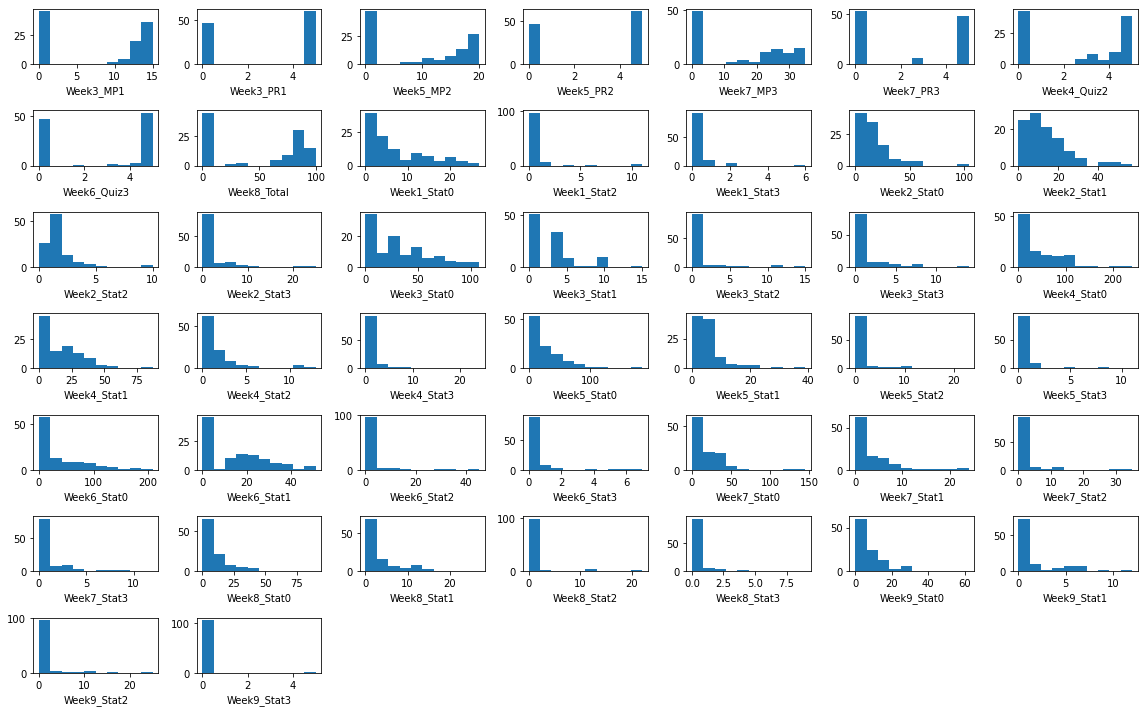

In [11]:
#Histogram of independent variables

fig = plt.figure(figsize=(16, 10)) 
vector_names = df.columns[0:45]

for i in range(1,indx_length):
    ax = fig.add_subplot(7, 7, i)
    plt.hist(df.iloc[:, i])
    ax.set_xlabel(vector_names[i])
    fig.tight_layout()
plt.show()

In [12]:
#Finding outliers using Z score
#Formula for Z score = (Observation — Mean)/Standard Deviation
#Find the outliers in the dataset without the 'Grade' column

df2 = df.loc[:, df.columns != 'Grade']
z_scores = stats.zscore(df2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df2[filtered_entries]
new_df

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3
2,1.67,13.0,5.0,15.22,5.0,27.05,2.5,5.00,5.0,79.44,...,0,0,8,2,0,0,9,0,1,0
5,3.33,14.0,5.0,14.78,5.0,15.51,5.0,4.67,4.5,71.79,...,0,3,12,0,0,0,7,2,0,0
6,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,0,1,0,0,0
7,5.00,15.0,5.0,20.00,5.0,35.00,5.0,4.71,5.0,99.71,...,3,3,21,12,1,0,15,0,1,0
8,0.00,13.0,5.0,20.00,5.0,34.60,5.0,2.71,0.0,85.31,...,0,0,14,0,0,0,12,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
99,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,0,2,0,0,0
100,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0,0,4,0,11,0,3,0,0,0
101,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,12,0,0,0,0,0,0,0,0,0


In [13]:
df = df[filtered_entries]
df

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
2,1.67,13.0,5.0,15.22,5.0,27.05,2.5,5.00,5.0,79.44,...,0,8,2,0,0,9,0,1,0,3
5,3.33,14.0,5.0,14.78,5.0,15.51,5.0,4.67,4.5,71.79,...,3,12,0,0,0,7,2,0,0,3
6,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0
7,5.00,15.0,5.0,20.00,5.0,35.00,5.0,4.71,5.0,99.71,...,3,21,12,1,0,15,0,1,0,5
8,0.00,13.0,5.0,20.00,5.0,34.60,5.0,2.71,0.0,85.31,...,0,14,0,0,0,12,2,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
99,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,2,0,0,0,0
100,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0,4,0,11,0,3,0,0,0,0
101,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#View the summary of the df
df.describe()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0,65.000000
mean,2.423077,7.501692,2.769231,8.287846,2.683846,13.541231,2.153846,2.642923,2.569231,44.572923,...,0.723077,6.615385,2.446154,0.492308,0.153846,6.261538,1.369231,0.738462,0.0,1.876923
std,1.980479,6.876763,2.504803,8.475870,2.504391,14.009611,2.415644,2.242552,2.422029,40.338516,...,1.243831,8.053905,3.913242,1.953547,0.507160,6.699526,2.382024,2.017710,0.0,1.924413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
50%,3.330000,11.000000,5.000000,7.390000,4.900000,14.720000,0.000000,3.500000,4.000000,62.150000,...,0.000000,4.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.0,2.000000
75%,4.170000,14.000000,5.000000,16.960000,5.000000,26.650000,5.000000,4.670000,5.000000,82.770000,...,1.000000,11.000000,4.000000,0.000000,0.000000,10.000000,2.000000,0.000000,0.0,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,...,6.000000,34.000000,14.000000,11.000000,2.000000,30.000000,9.000000,11.000000,0.0,5.000000


In [15]:
#Find the columns containing only 0 for all rows
df.loc[:, (df == 0).all()]

,Week9_Stat3
2,0
5,0
6,0
7,0
8,0
...,...
97,0
99,0
100,0
101,0


In [16]:
#Delete this column since it is not useful for our analysis and remove the ID column
df = df.drop(columns=['Week9_Stat3'])

In [17]:
#Let's see the correlation between all explanatory variables and the response variable
corr_matrix = df.corr().abs()
corr_matrix

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Grade
Week2_Quiz1,1.000000,0.687693,0.686791,0.580272,0.645212,0.566866,0.538790,0.699566,0.662167,0.678749,...,0.179284,0.466809,0.352541,0.377658,0.161738,0.297268,0.488934,0.392372,0.092444,0.602264
Week3_MP1,0.687693,1.000000,0.986710,0.865370,0.949661,0.861577,0.792746,0.855991,0.897559,0.954477,...,0.117329,0.484139,0.640401,0.543505,0.111719,0.286653,0.639044,0.516378,0.005722,0.878713
Week3_PR1,0.686791,0.986710,1.000000,0.884447,0.969326,0.874272,0.806485,0.877541,0.901535,0.964890,...,0.125686,0.500745,0.646139,0.541496,0.123306,0.274382,0.640534,0.519930,0.006421,0.882191
Week5_MP2,0.580272,0.865370,0.884447,1.000000,0.911987,0.899682,0.872286,0.755756,0.807889,0.952892,...,0.100579,0.531034,0.663070,0.558637,0.133735,0.035409,0.667550,0.432221,0.010330,0.955249
Week5_PR2,0.645212,0.949661,0.969326,0.911987,1.000000,0.900916,0.834650,0.843133,0.867061,0.969277,...,0.111609,0.516593,0.653222,0.562752,0.115494,0.223422,0.635770,0.536515,0.017920,0.909300
Week7_MP3,0.566866,0.861577,0.874272,0.899682,0.900916,1.000000,0.777379,0.737629,0.757917,0.954338,...,0.088035,0.484249,0.628665,0.596911,0.137259,0.057326,0.581705,0.510990,0.012051,0.967737
Week7_PR3,0.538790,0.792746,0.806485,0.872286,0.834650,0.777379,1.000000,0.709662,0.768617,0.862249,...,0.082616,0.461624,0.613460,0.467012,0.128875,0.171687,0.609106,0.538494,0.053265,0.856190
Week4_Quiz2,0.699566,0.855991,0.877541,0.755756,0.843133,0.737629,0.709662,1.000000,0.896853,0.854026,...,0.163542,0.426076,0.550645,0.466641,0.135686,0.289339,0.507011,0.418923,0.009014,0.753783
Week6_Quiz3,0.662167,0.897559,0.901535,0.807889,0.867061,0.757917,0.768617,0.896853,1.000000,0.884242,...,0.113501,0.496593,0.565693,0.492082,0.109687,0.271039,0.556887,0.458617,0.011756,0.808084
Week8_Total,0.678749,0.954477,0.964890,0.952892,0.969277,0.954338,0.862249,0.854026,0.884242,1.000000,...,0.116100,0.529527,0.666132,0.587901,0.139430,0.164361,0.652582,0.524246,0.010484,0.969110


In [18]:
#Based on the correlation matrix, it is possible to conclude which variables are to be included into 
#our model and which variables can be excluded since they have low correlation coefficient.
corr_matrix[(corr_matrix['Grade']>0.8) & (corr_matrix['Grade'] != 1)]

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Grade
Week3_MP1,0.687693,1.000000,0.986710,0.865370,0.949661,0.861577,0.792746,0.855991,0.897559,0.954477,...,0.117329,0.484139,0.640401,0.543505,0.111719,0.286653,0.639044,0.516378,0.005722,0.878713
Week3_PR1,0.686791,0.986710,1.000000,0.884447,0.969326,0.874272,0.806485,0.877541,0.901535,0.964890,...,0.125686,0.500745,0.646139,0.541496,0.123306,0.274382,0.640534,0.519930,0.006421,0.882191
Week5_MP2,0.580272,0.865370,0.884447,1.000000,0.911987,0.899682,0.872286,0.755756,0.807889,0.952892,...,0.100579,0.531034,0.663070,0.558637,0.133735,0.035409,0.667550,0.432221,0.010330,0.955249
Week5_PR2,0.645212,0.949661,0.969326,0.911987,1.000000,0.900916,0.834650,0.843133,0.867061,0.969277,...,0.111609,0.516593,0.653222,0.562752,0.115494,0.223422,0.635770,0.536515,0.017920,0.909300
Week7_MP3,0.566866,0.861577,0.874272,0.899682,0.900916,1.000000,0.777379,0.737629,0.757917,0.954338,...,0.088035,0.484249,0.628665,0.596911,0.137259,0.057326,0.581705,0.510990,0.012051,0.967737
Week7_PR3,0.538790,0.792746,0.806485,0.872286,0.834650,0.777379,1.000000,0.709662,0.768617,0.862249,...,0.082616,0.461624,0.613460,0.467012,0.128875,0.171687,0.609106,0.538494,0.053265,0.856190
Week6_Quiz3,0.662167,0.897559,0.901535,0.807889,0.867061,0.757917,0.768617,0.896853,1.000000,0.884242,...,0.113501,0.496593,0.565693,0.492082,0.109687,0.271039,0.556887,0.458617,0.011756,0.808084
Week8_Total,0.678749,0.954477,0.964890,0.952892,0.969277,0.954338,0.862249,0.854026,0.884242,1.000000,...,0.116100,0.529527,0.666132,0.587901,0.139430,0.164361,0.652582,0.524246,0.010484,0.969110


In [19]:
important_columns = corr_matrix[corr_matrix['Grade']>0.8].index
important_columns

Index(['Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3',
       'Week7_PR3', 'Week6_Quiz3', 'Week8_Total', 'Grade'],
      dtype='object')

In [20]:
#Subset the dataframe including only the most important variables 
#based on the correlation score, including Grade column
df = df[important_columns]
df

,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week6_Quiz3,Week8_Total,Grade
2,13.0,5.0,15.22,5.0,27.05,2.5,5.0,79.44,3
5,14.0,5.0,14.78,5.0,15.51,5.0,4.5,71.79,3
6,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0
7,15.0,5.0,20.00,5.0,35.00,5.0,5.0,99.71,5
8,13.0,5.0,20.00,5.0,34.60,5.0,0.0,85.31,4
...,...,...,...,...,...,...,...,...,...
97,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0
99,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0
100,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0
101,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0


In [21]:
# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week6_Quiz3,Week8_Total,Grade,is_train
2,13.0,5.0,15.22,5.0,27.05,2.5,5.0,79.44,3,True
5,14.0,5.0,14.78,5.0,15.51,5.0,4.5,71.79,3,True
6,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0,True
7,15.0,5.0,20.00,5.0,35.00,5.0,5.0,99.71,5,True
8,13.0,5.0,20.00,5.0,34.60,5.0,0.0,85.31,4,True


In [22]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [23]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 51
Number of observations in the test data: 14


In [24]:
df

,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week6_Quiz3,Week8_Total,Grade,is_train
2,13.0,5.0,15.22,5.0,27.05,2.5,5.0,79.44,3,True
5,14.0,5.0,14.78,5.0,15.51,5.0,4.5,71.79,3,True
6,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0,True
7,15.0,5.0,20.00,5.0,35.00,5.0,5.0,99.71,5,True
8,13.0,5.0,20.00,5.0,34.60,5.0,0.0,85.31,4,True
...,...,...,...,...,...,...,...,...,...,...
97,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0,True
99,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0,True
100,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0,True
101,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0,True


In [25]:
# Create a list of the feature column's names
features = df.columns[0:8]

# View features
features

Index(['Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3',
       'Week7_PR3', 'Week6_Quiz3', 'Week8_Total'],
      dtype='object')

In [26]:
y = train['Grade'] 

# View target
y

2      3
5      3
6      0
7      5
8      4
9      3
10     0
18     0
20     0
21     3
25     3
26     2
27     3
33     0
36     5
37     3
38     0
44     4
46     3
48     2
51     3
53     4
54     2
55     5
56     2
57     0
59     4
60     0
61     0
63     4
66     4
67     3
69     3
70     4
71     5
72     4
75     4
77     0
82     0
84     0
85     0
87     0
88     0
92     0
94     0
96     0
97     0
99     0
100    0
101    0
105    0
Name: Grade, dtype: int64

In [27]:
train[features].columns


Index(['Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3',
       'Week7_PR3', 'Week6_Quiz3', 'Week8_Total'],
      dtype='object')

In [28]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the grade)
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [29]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([0, 5, 0, 0, 2, 4, 3, 5, 0, 0, 4, 4, 0, 0])

In [30]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.02, 0.01, 0.37, 0.6 ],
       [0.46, 0.25, 0.25, 0.04, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.33, 0.35, 0.32, 0.  , 0.  ],
       [0.  , 0.  , 0.37, 0.57, 0.06],
       [0.  , 0.13, 0.87, 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.24, 0.75],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ]])

In [31]:
# Create actual english names for the plants for each predicted plant class
preds = clf.predict(test[features])

In [32]:
# View the PREDICTED species for the first five observations
preds[0:5]

array([0, 5, 0, 0, 2])

In [33]:
# View the ACTUAL species for the first five observations
test['Grade'].head()

11    0
13    5
19    0
23    0
28    0
Name: Grade, dtype: int64

In [34]:
# Create confusion matrix
pd.crosstab(test['Grade'], preds, rownames=['Actual Grade'], colnames=['Predicted Grade'])

Predicted Grade,0,2,3,4,5
Actual Grade,,,,,
0,7,1,0,0,0
3,0,0,1,0,0
4,0,0,0,3,0
5,0,0,0,0,2


In [35]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('Week3_MP1', 0.1387276471683756),
 ('Week3_PR1', 0.07470812025364373),
 ('Week5_MP2', 0.19272924048422643),
 ('Week5_PR2', 0.061121524485376735),
 ('Week7_MP3', 0.16626507972187565),
 ('Week7_PR3', 0.020170026378447576),
 ('Week6_Quiz3', 0.04690476155680896),
 ('Week8_Total', 0.29937359995124524)]